(paddle_env) (base) root@iZ2ze9fpyd939c7va1hxm7Z:~/codes/ocr# pip config list
global.index-url='https://mirrors.aliyun.com/pypi/simple/'
install.trusted-host='mirrors.cloud.aliyuncs.com'

pip config set global.index-url https://mirrors.aliyun.com/pypi/simple/
pip config set install.trusted-host mirrors.cloud.aliyuncs.com

pip config set global.index-url https://pypi.tuna.tsinghua.edu.cn/simple/
pip config set install.trusted-host mirrors.cloud.aliyuncs.com


In [1]:
! pip config set global.index_url https://mirrors.aliyun.com/pypi/simple/
! pip config set install.trusted-host mirrors.cloud.aliyuncs.com
! pip config list
! pip install setuptools-scm

Writing to /root/.config/pip/pip.conf
Writing to /root/.config/pip/pip.conf
global.index-url='https://mirrors.aliyun.com/pypi/simple/'
install.trusted-host='mirrors.cloud.aliyuncs.com'


In [4]:
! pip install paddlehub

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/


使用Paddlehub实现街景动漫化，只需要几行命令。

In [5]:
! hub install animegan_v2_hayao_64

/root/miniconda3/envs/paddle_learn/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Download https://bj.bcebos.com/paddlehub/paddlehub_dev/animegan_v2_hayao_64_1_1_0.zip
[##################################################] 100.00%
Decompress /root/.paddlehub/tmp/tmpu8dllnpu/animegan_v2_hayao_64_1_1_0.zip
[##################################################] 100.00%
[2024-02-06 15:35:32,298] [    INFO] - Successfully installed animegan_v2_hayao_64-1.1.0


In [6]:
import  os

import cv2
import paddlehub as hub
import matplotlib.pyplot as plt
%matplotlib inline

os.environ['CUDA_VISIBLE_DEVICES'] = '0'
model = hub.Module(name='animegan_v2_hayao_64', use_gpu=True)

# 模型预测
result = model.style_transfer(images=[cv2.imread('demo.jpg')])
plt.figure(figsize=(10,10))
plt.imshow(result[0][:,:,[2,1,0]])
plt.show()

/root/miniconda3/envs/paddle_learn/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


NotImplementedError: (Unimplemented) There are no kernels which are registered in the pad2d operator.
  [Hint: Expected kernels_iter != all_op_kernels.end(), but received kernels_iter == all_op_kernels.end().] (at ../paddle/fluid/framework/operator.cc:2268)
  [operator < pad2d > error]

# 快速使用PaddleHub

既然PaddleHub的使用如此简单，功能又如此强大，那么读者们是否迫不及待了呢？下面我们就展示下快速使用PaddleHub的两种方式：Python代码调用和命令行调用。

### 通过Python代码调用方式 使用PaddleHub

首先以计算机视觉任务为例，我们选用一张测试图片test.jpg，分别实现如下四项功能：
* 人像抠图（[deeplabv3p_xception65_humanseg](https://www.paddlepaddle.org.cn/hubdetail?name=deeplabv3p_xception65_humanseg&en_category=ImageSegmentation)）
* 人体部位分割（[ace2p](https://www.paddlepaddle.org.cn/hubdetail?name=ace2p&en_category=ImageSegmentation)）

* 人脸检测（[ultra_light_fast_generic_face_detector_1mb_640](https://www.paddlepaddle.org.cn/hubdetail?name=ultra_light_fast_generic_face_detector_1mb_640&en_category=FaceDetection)）
* 关键点检测（[human_pose_estimation_resnet50_mpii](https://www.paddlepaddle.org.cn/hubdetail?name=human_pose_estimation_resnet50_mpii&en_category=KeyPointDetection)）

注：有关调用的模型名字参考[官方网站](https://www.paddlepaddle.org.cn/hublist)查询。



### 原图展示


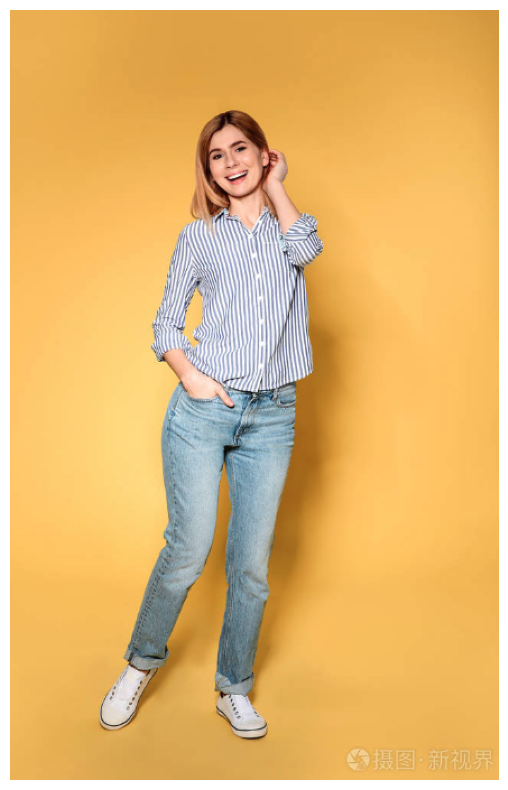

In [14]:
# 待预测图片
test_img_path = ["./test3.png"]

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 

img = mpimg.imread(test_img_path[0]) 

# 展示待预测图片
plt.figure(figsize=(10,10))
plt.imshow(img) 
plt.axis('off') 
plt.show()

#### 人像扣图

In [9]:
#安装预训练模型
!hub install deeplabv3p_xception65_humanseg

/root/miniconda3/envs/paddle_learn/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[2024-02-06 15:54:07,665] [ WARNING] - An error was encountered while loading deeplabv3p_xception65_humanseg. Detailed error information can be found in the /root/.paddlehub/log/20240206.log.
Download https://bj.bcebos.com/paddlehub/paddlehub_dev/deeplabv3p_xception65_humanseg_1_2_0.zip
[##################################################] 100.00%
Decompress /root/.paddlehub/tmp/tmp11yqu3d0/deeplabv3p_xception65_humanseg_1_2_0.zip
[##################################################] 100.00%
[2024-02-06 15:54:20,667] [    INFO] - Successfully uninstalled deeplabv3p_xception65_humanseg
[2024-02-06 15:54:20,934] [    INFO] - Successfully installed deeplabv3p_xception65_humanseg-1.2.0


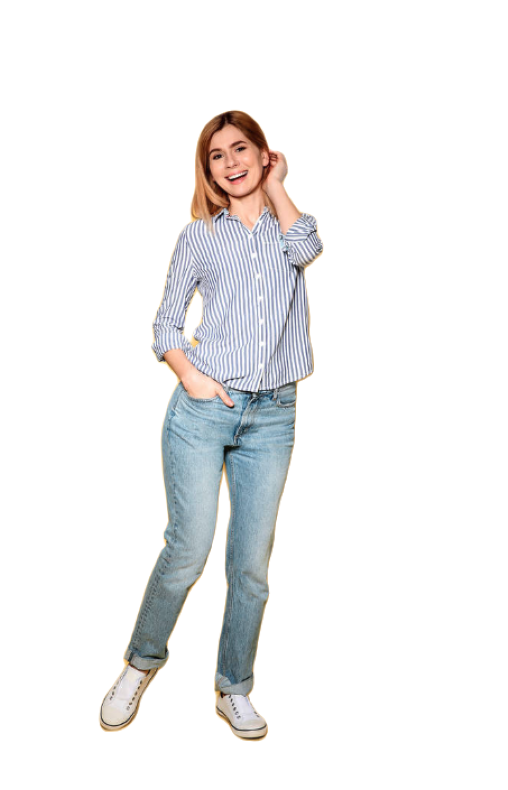

In [15]:
import paddlehub as hub
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

module = hub.Module(name="deeplabv3p_xception65_humanseg")
res = module.segmentation(paths = ["./test3.png"], visualization=True, output_dir='humanseg_output')


res_img_path = 'humanseg_output/test3.png'
img = mpimg.imread(res_img_path)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

#### 人体部位分割

In [16]:
#安装预训练模型
!hub install ace2p

/root/miniconda3/envs/paddle_learn/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[2024-02-06 15:59:20,396] [ WARNING] - An error was encountered while loading ace2p. Detailed error information can be found in the /root/.paddlehub/log/20240206.log.
Download https://bj.bcebos.com/paddlehub/paddlehub_dev/ace2p_1_2_0.zip
[##################################################] 100.00%
Decompress /root/.paddlehub/tmp/tmprz90_ts0/ace2p_1_2_0.zip
[##################################################] 100.00%
[2024-02-06 15:59:41,853] [    INFO] - Successfully uninstalled ace2p
[2024-02-06 15:59:42,212] [    INFO] - Successfully installed ace2p-1.2.0


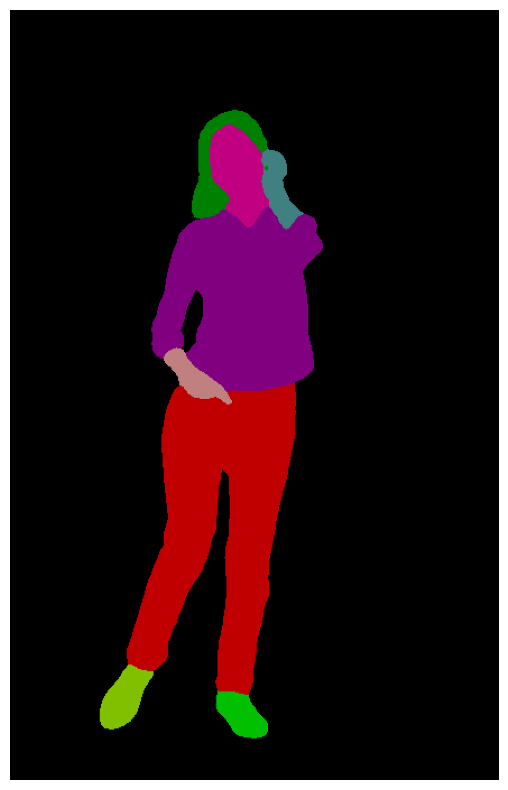

In [20]:
import paddlehub as hub
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

module = hub.Module(name="ace2p")
res = module.segmentation(paths = ["./test3.png"], visualization=True, output_dir='ace2p_output')

res_img_path = './ace2p_output/test3.png'
img = mpimg.imread(res_img_path)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

#### 人脸检测

In [22]:
#安装预训练模型
!hub install ultra_light_fast_generic_face_detector_1mb_640

/root/miniconda3/envs/paddle_learn/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[2024-02-06 16:01:08,206] [ WARNING] - An error was encountered while loading ultra_light_fast_generic_face_detector_1mb_640. Detailed error information can be found in the /root/.paddlehub/log/20240206.log.
Download https://bj.bcebos.com/paddlehub/paddlehub_dev/ultra_light_fast_generic_face_detector_1mb_640_1_2_0.zip
[##################################################] 100.00%
Decompress /root/.paddlehub/tmp/tmpf7cicccp/ultra_light_fast_generic_face_detector_1mb_640_1_2_0.zip
[##################################################] 100.00%
[2024-02-06 16:01:08,678] [    INFO] - Successfully uninstalled ultra_light_fast_generic_face_detector_1mb_640
[2024-02-06 16:01:08,808] [    INFO] - Successfully installed ultra_light_fast_generic_face_detector_1mb_640-1.2.0


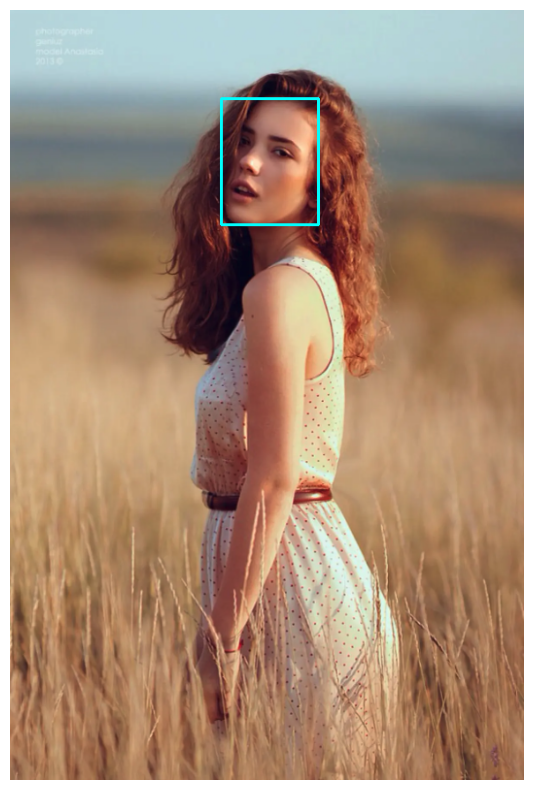

In [25]:
import paddlehub as hub
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

module = hub.Module(name="ultra_light_fast_generic_face_detector_1mb_640")
res = module.face_detection(paths = ["./test2.png"], visualization=True, output_dir='face_detection_output')

res_img_path = './face_detection_output/test2.png'
img = mpimg.imread(res_img_path)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

#### 关键点检测

In [26]:
#安装预训练模型
!hub install human_pose_estimation_resnet50_mpii

/root/miniconda3/envs/paddle_learn/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Download https://bj.bcebos.com/paddlehub/paddlehub_dev/human_pose_estimation_resnet50_mpii_1_2_0.zip
[##################################################] 100.00%
Decompress /root/.paddlehub/tmp/tmpmkxhnu9h/human_pose_estimation_resnet50_mpii_1_2_0.zip
[##################################################] 100.00%
[2024-02-06 16:02:04,570] [    INFO] - Successfully installed human_pose_estimation_resnet50_mpii-1.2.0


image saved in keypoint_output/test3time=1707206618.jpg


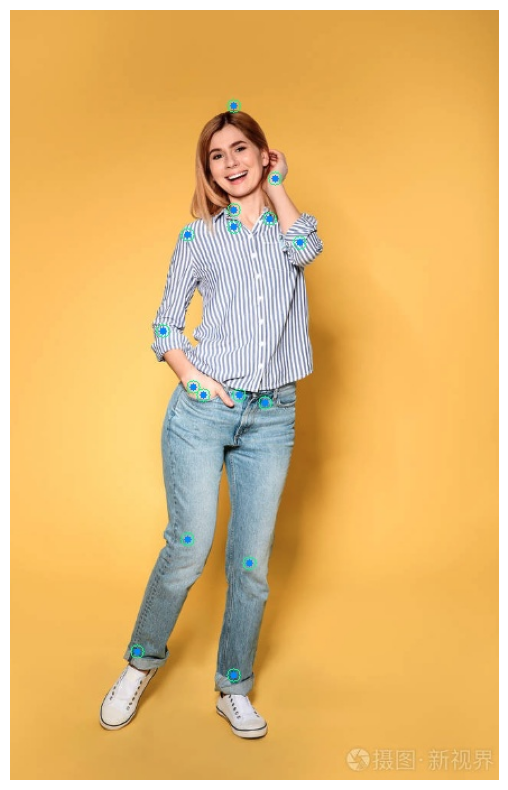

In [32]:
import paddlehub as hub
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

module = hub.Module(name="human_pose_estimation_resnet50_mpii")
res = module.keypoint_detection(paths = ["./test3.png"], visualization=True, output_dir='keypoint_output')

res_img_path = './keypoint_output/test3.jpg'
img = mpimg.imread(res_img_path)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

#### NLP 任务

对于自然语言处理任务，下面以中文分词和情感分类的任务为例，待处理的数据以函数参数的形式传入。

In [33]:
#安装预训练模型
!hub install lac

/root/miniconda3/envs/paddle_learn/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Download https://bj.bcebos.com/paddlehub/paddlehub_dev/lac_2.4.0.zip
[##################################################] 100.00%
Decompress /root/.paddlehub/tmp/tmpti65617w/lac_2.4.0.zip
[##################################################] 100.00%
[2024-02-06 16:04:14,194] [    INFO] - Successfully installed lac-2.4.0


In [34]:
import paddlehub as hub
lac = hub.Module(name="lac")
test_text = ["1996年，曾经是微软员工的加布·纽维尔和麦克·哈灵顿一同创建了Valve软件公司。他们在1996年下半年从id software取得了雷神之锤引擎的使用许可，用来开发半条命系列。"]
res = lac.lexical_analysis(texts = test_text)

print("中文词法分析结果：", res)

中文词法分析结果： [{'word': ['1996年', '，', '曾经', '是', '微软', '员工', '的', '加布·纽维尔', '和', '麦克·哈灵顿', '一同', '创建', '了', 'Valve软件公司', '。', '他们', '在', '1996年下半年', '从', 'id', ' ', 'software', '取得', '了', '雷神之锤', '引擎', '的', '使用', '许可', '，', '用来', '开发', '半条命', '系列', '。'], 'tag': ['TIME', 'w', 'd', 'v', 'ORG', 'n', 'u', 'PER', 'c', 'PER', 'd', 'v', 'u', 'ORG', 'w', 'r', 'p', 'TIME', 'p', 'nz', 'w', 'n', 'v', 'u', 'n', 'n', 'u', 'vn', 'vn', 'w', 'v', 'v', 'n', 'n', 'w']}]


In [35]:
#安装预训练模型
! hub install senta_bilstm

/root/miniconda3/envs/paddle_learn/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Download https://bj.bcebos.com/paddlehub/paddlehub_dev/senta_bilstm_1.2.1.tar.gz
[##################################################] 100.00%
Decompress /root/.paddlehub/tmp/tmp86a62p48/senta_bilstm_1.2.1.tar.gz
[##################################################] 100.00%
[2024-02-06 16:06:22,783] [    INFO] - Successfully installed senta_bilstm-1.2.1


In [37]:
import paddlehub as hub
senta = hub.Module(name="senta_bilstm")
test_text = ["味道不错，确实不算太辣，适合不能吃辣的人。就在长江边上，抬头就能看到长江的风景。鸭肠、黄鳝都比较新鲜。"]
res = senta.sentiment_classify(texts = test_text)

print("中文词法分析结果：", res)

[2024-02-06 16:07:41,694] [ WARNING] - The _initialize method in HubModule will soon be deprecated, you can use the __init__() to handle the initialization of the object


中文词法分析结果： [{'text': '味道不错，确实不算太辣，适合不能吃辣的人。就在长江边上，抬头就能看到长江的风景。鸭肠、黄鳝都比较新鲜。', 'sentiment_label': 1, 'sentiment_key': 'positive', 'positive_probs': 0.9771, 'negative_probs': 0.0229}]


### 通过命令行调用方式 使用PaddleHub
 
PaddleHub在设计时，为模型的管理和使用提供了命令行工具，也提供了通过命令行调用PaddleHub模型完成预测的方式。比如，上面人像分割和文本分词的任务也可以通过命令行调用的方式实现。


In [36]:
#通过命令行方式实现人像分割任务
! hub run deeplabv3p_xception65_humanseg --input_path test2.png

/root/miniconda3/envs/paddle_learn/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[{'data': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)}]


In [38]:
#通过命令行方式实现文本分词任务
!hub run lac --input_text "今天是个好日子"

/root/miniconda3/envs/paddle_learn/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[{'word': ['今天', '是', '个', '好日子'], 'tag': ['TIME', 'v', 'q', 'n']}]


上面的命令中包含四个部分，分别是：
- hub  表示PaddleHub的命令。
- run 调用run执行模型的预测。
- deeplabv3p_xception65_humanseg、lac 表示要调用的算法模型。
- --input_path/--input_text  表示模型的输入数据，图像和文本的输入方式不同。

PaddleHub的命令行工具在开发时借鉴了Anaconda和PIP等软件包管理的理念，可以方便快捷的完成模型的搜索、下载、安装、升级、预测等功能。 
可点击[Github的网址](https://github.com/PaddlePaddle/PaddleHub/wiki/PaddleHub%E5%91%BD%E4%BB%A4%E8%A1%8C%E5%B7%A5%E5%85%B7)了解详情。
目前，PaddleHub的命令行工具支持以下12个命令：

* install：用于将Module安装到本地，默认安装在{HUB_HOME}/.paddlehub/modules目录下；
* uninstall：卸载本地Module；
* show：用于查看本地已安装Module的属性或者指定目录下确定的Module的属性，包括其名字、版本、描述、作者等信息；
* download：用于下载百度提供的Module；
* search：通过关键字在服务端检索匹配的Module，当想要查找某个特定模型的Module时，使用search命令可以快速得到结果，例如hub search ssd命令，会查找所有包含了ssd字样的Module；
* list：列出本地已经安装的Module；
* run：用于执行Module的预测；
* version：显示PaddleHub版本信息；
* help：显示帮助信息；
* clear：PaddleHub在使用过程中会产生一些缓存数据，这部分数据默认存放在${HUB_HOME}/.paddlehub/cache目录下，用户可以通过clear命令来清空缓存；
* config：用于查看和设置Paddlehub相关设置，包括对server地址、日志级别的设置；
* serving：用于一键部署Module预测服务，详细用法见[PaddleHub Serving一键服务部署](https://github.com/PaddlePaddle/PaddleHub/blob/release/v2.0.0-beta/docs/docs_ch/tutorial/serving.md)。

PaddleHub的产品理念是模型即软件，通过Python API或命令行实现模型调用，可快速体验或集成飞桨特色预训练模型。
此外，当用户想用少量数据来优化预训练模型时，PaddleHub也支持迁移学习，通过Fine-tune API，内置多种优化策略，只需少量代码即可完成预训练模型的Fine-tuning。

# PaddleHub提供的预训练模型

为了更好的应用PaddleHub的各种能力，我们需要知道PaddleHub集成了哪些模型。PaddleHub提供的预训练模型涵盖了**文本，图像，视频，语音，工业应用**等主流模型。PaddleHub的资源已有300多个分布在各领域的预训练模型，其中各领域均有百度独有数据训练或独有技术积累的模型，如 **图4** 所示。

<center><img src="https://ai-studio-static-online.cdn.bcebos.com/b752f603c93345a682a4c97852fb47f17277259aff4d4987ae80adf4935e87a0" width="800" hegiht="" ></center>
<br><center>图4：PaddleHub特色预训练模型</center></br>
<br></br>

PaddleHub中集成的[模型列表](https://github.com/PaddlePaddle/PaddleHub)，目前仍然持续扩充中，非常欢迎您体验或为开源社区贡献优秀模型。


# 使用自己的数据Fine-tune PaddleHub预训练模型

果农需要根据水果的不同大小和质量进行产品的定价，所以每年收获的季节有大量的人工对水果分类的需求。基于人工智能模型的方案，收获的大堆水果会被机械放到传送带上，模型会根据摄像头拍到的图片，控制仪器实现水果的自动分拣，节省了果农大量的人力。
  
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/16acdecde2264dcd938458241ae925cbbbbbc949dbf64654978c6fc5074f8198" width="400" hegiht="" ></center>
<br><center>图5：水果在工厂传送带上自动分类</center></br>
<br></br>

下面我们就看看如果采集到少量的桃子数据，如何基于PaddleHub对ImageNet数据集上预训练模型进行Fine-tune，得到一个更有效的模型。桃子分类数据集取自AI Studio公开数据集桃脸识别，该桃脸识别数据集中已经将所有桃子的图片分为2个文件夹，一个是训练集一个是测试集；每个文件夹中有4个分类，分别是B1、M2、R0、S3。


<center><img src="https://ai-studio-static-online.cdn.bcebos.com/748fb4a9781944709451a3eb51acc31ad2b9ba42589d4a9ea6122e589ab8055e" width="400" hegiht="" ></center>
<br><center>图6：自动分类结果示意</center></br>
<br></br>


实现迁移学习，包括如下步骤：
1. 安装PaddleHub
1. 数据准备
1. 模型准备
1. 训练准备

下面将根据这四个主要步骤，展示如何利用PaddleHub实现finetune。

### 1. 安装PaddleHub

paddlehub安装可以使用pip完成安装，如下：
```
# 安装并升级PaddleHub，使用百度源更稳定、更迅速
pip install paddlehub==2.1 -i https://mirror.baidu.com/pypi/simple
```

### 2. 数据准备

在本次教程提供的数据文件中，已经提供了分割好的训练集、验证集、测试集的索引和标注文件。如果用户利用PaddleHub迁移CV类任务使用自定义数据，则需要自行切分数据集，将数据集切分为训练集、验证集和测试集。需要三个文本文件来记录对应的图片路径和标签，此外还需要一个标签文件用于记录标签的名称。相关方法可参考[用户自定义PaddleHub的数据格式](https://github.com/PaddlePaddle/PaddleHub/wiki/PaddleHub%E9%80%82%E9%85%8D%E8%87%AA%E5%AE%9A%E4%B9%89%E6%95%B0%E6%8D%AE%E5%AE%8C%E6%88%90FineTune)。

```
├─data: 数据目录	
  ├─train_list.txt：训练集数据列表	
  ├─test_list.txt：测试集数据列表	
  ├─validate_list.txt：验证集数据列表	
  ├─label_list.txt：标签列表	
  └─……	
```
训练集、验证集和测试集的数据列表文件的格式如下，列与列之间以空格键分隔。
```
图片1路径 图片1标签	
图片2路径 图片2标签	
...
```
label_list.txt的格式如下：
 ```
分类1名称	
分类2名称	
...	
 ```


In [1]:
!unzip -q -o ./data/peach.zip -d ./work

准备好数据后即可使用PaddleHub完成数据读取器的构建，实现方法如下所示：构建数据读取Python类，并继承paddle.io.Dataset这个类完成数据读取器构建。在定义数据集时，需要预先定义好对数据集的预处理操作，并且设置好数据模式。在数据集定义中，需要重新定义`__init__`，`__getitem__`和`__len__`三个部分。示例如下：

In [2]:
import os

import paddle
import paddlehub as hub

class DemoDataset(paddle.io.Dataset):
    def __init__(self, transforms, num_classes=4, mode='train'):	
        # 数据集存放位置
        self.dataset_dir = "./work/peach-classification"  #dataset_dir为数据集实际路径，需要填写全路径
        self.transforms = transforms
        self.num_classes = num_classes
        self.mode = mode

        if self.mode == 'train':
            self.file = 'train_list.txt'
        elif self.mode == 'test':
            self.file = 'test_list.txt'
        else:
            self.file = 'validate_list.txt'
        
        self.file = os.path.join(self.dataset_dir , self.file)
        with open(self.file, 'r') as file:
            self.data = file.read().split('\n')[:-1]
            
    def __getitem__(self, idx):
        img_path, grt = self.data[idx].split(' ')
        img_path = os.path.join(self.dataset_dir, img_path)
        im = self.transforms(img_path)
        return im, int(grt)


    def __len__(self):
        return len(self.data)

/root/miniconda3/envs/paddle_learn/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


将训练数据输入模型之前，我们通常还需要对原始数据做一些数据处理的工作，比如数据格式的规范化处理，或增加一些数据增强策略。

构建图像分类模型的数据读取器，负责将桃子dataset的数据进行预处理，以特定格式组织并输入给模型进行训练。

如下数据处理策略，只做了两种操作：
1. 指定输入图片的尺寸，并将所有样本数据统一处理成该尺寸。
2. 对所有输入图片数据进行归一化处理。

对数据预处理及加载数据集的示例如下：

In [3]:
import paddlehub.vision.transforms as T

transforms = T.Compose(
        [T.Resize((256, 256)),
         T.CenterCrop(224),
         T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])],
        to_rgb=True)

peach_train = DemoDataset(transforms)
peach_validate =  DemoDataset(transforms, mode='val')

PaddleHub提供了丰富的数据预处理方式，具体可以参见[预处理](https://github.com/PaddlePaddle/PaddleHub/blob/release/v2.0.0-beta/docs/docs_ch/reference/vision.md)。

### 3. 模型准备

我们要在PaddleHub中选择合适的预训练模型来Fine-tune，由于桃子分类是一个图像分类任务，这里采用Resnet50模型，并且是采用ImageNet数据集Fine-tune过的版本。这个预训练模型是在图像任务中的一个“万金油”模型，Resnet是目前较为有效的处理图像的网络结构，50层是一个精度和性能兼顾的选择，而ImageNet又是计算机视觉领域公开的最大的分类数据集。所以，在不清楚选择什么模型好的时候，可以优先以这个模型作为baseline。

使用PaddleHub，不需要重新手写Resnet50网络，可以通过一行代码实现模型的调用。

In [40]:
#安装预训练模型
! hub install resnet50_vd_imagenet_ssld

/root/miniconda3/envs/paddle_learn/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Download https://bj.bcebos.com/paddlehub/paddlehub_dev/resnet50_vd_imagenet_ssld.tar.gz
[##################################################] 100.00%
Decompress /root/.paddlehub/tmp/tmp6uu70o_5/resnet50_vd_imagenet_ssld.tar.gz
[##################################################] 100.00%
[2024-02-06 16:13:57,019] [    INFO] - Successfully installed resnet50_vd_imagenet_ssld-1.1.0


In [4]:
import paddlehub as hub

model = hub.Module(name='resnet50_vd_imagenet_ssld', label_list=["R0", "B1", "M2", "S3"])

W0211 19:53:10.413689 861617 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 12.2, Runtime API Version: 12.0
W0211 19:53:10.415225 861617 gpu_resources.cc:164] device: 0, cuDNN Version: 8.9.


load pretrained parameters success


/root/miniconda3/envs/paddle_learn/lib/python3.8/site-packages/paddle/nn/layer/layers.py:2084: UserWarning: Skip loading for out.weight. out.weight receives a shape [2048, 1000], but the expected shape is [2048, 4].
  warnings.warn(f"Skip loading for {key}. " + str(err))
/root/miniconda3/envs/paddle_learn/lib/python3.8/site-packages/paddle/nn/layer/layers.py:2084: UserWarning: Skip loading for out.bias. out.bias receives a shape [1000], but the expected shape is [4].
  warnings.warn(f"Skip loading for {key}. " + str(err))


### 4. 训练准备
定义好模型，也准备好数据后，我们就可以开始设置训练的策略。Paddle2.2提供了多种优化器选择，如SGD, Adam, Adamax等，详细参见[策略](https://www.paddlepaddle.org.cn/documentation/docs/zh/2.0-rc1/api/paddle/optimizer/Overview_cn.html)。

In [5]:
from paddlehub.finetune.trainer import Trainer

import paddle

optimizer = paddle.optimizer.Adam(learning_rate=0.001, parameters=model.parameters())
trainer = Trainer(model, optimizer, checkpoint_dir='img_classification_ckpt', use_gpu=True) 
trainer.train(peach_train, epochs=10, batch_size=16, eval_dataset=peach_validate, save_interval=1)

[2024-02-11 19:53:15,404] [ WARNING] - PaddleHub model checkpoint not found, start from scratch...
[2024-02-11 19:53:17,333] [   TRAIN] - Epoch=1/10, Step=10/375 loss=1.0873 acc=0.5437 lr=0.001000 step/sec=5.19 | ETA 00:12:02
[2024-02-11 19:53:18,103] [   TRAIN] - Epoch=1/10, Step=20/375 loss=0.7300 acc=0.7000 lr=0.001000 step/sec=12.99 | ETA 00:08:25
[2024-02-11 19:53:18,973] [   TRAIN] - Epoch=1/10, Step=30/375 loss=0.6074 acc=0.7188 lr=0.001000 step/sec=11.49 | ETA 00:07:25
[2024-02-11 19:53:19,863] [   TRAIN] - Epoch=1/10, Step=40/375 loss=0.2843 acc=0.9000 lr=0.001000 step/sec=11.23 | ETA 00:06:57
[2024-02-11 19:53:20,767] [   TRAIN] - Epoch=1/10, Step=50/375 loss=0.2161 acc=0.9250 lr=0.001000 step/sec=11.06 | ETA 00:06:42
[2024-02-11 19:53:21,692] [   TRAIN] - Epoch=1/10, Step=60/375 loss=0.1360 acc=0.9563 lr=0.001000 step/sec=10.81 | ETA 00:06:32
[2024-02-11 19:53:22,564] [   TRAIN] - Epoch=1/10, Step=70/375 loss=0.1605 acc=0.9500 lr=0.001000 step/sec=11.46 | ETA 00:06:23
[2024-

其中`Adam`:

* `learning_rate`: 全局学习率。默认为1e-3；
* `parameters`: 待优化模型参数。

#### 运行配置

`Trainer` 主要控制Fine-tune的训练，包含以下可控制的参数:

* `model`: 被优化模型；
* `optimizer`: 优化器选择；
* `use_gpu`: 是否使用gpu；
* `use_vdl`: 是否使用vdl可视化训练过程；
* `checkpoint_dir`: 保存模型参数的地址；
* `compare_metrics`: 保存最优模型的衡量指标；

`trainer.train` 主要控制具体的训练过程，包含以下可控制的参数：

* `train_dataset`: 训练时所用的数据集；
* `epochs`: 训练轮数；
* `batch_size`: 训练的批大小，如果使用GPU，请根据实际情况调整batch_size；
* `num_workers`: works的数量，默认为0；
* `eval_dataset`: 验证集；
* `log_interval`: 打印日志的间隔， 单位为执行批训练的次数。
* `save_interval`: 保存模型的间隔频次，单位为执行训练的轮数。

当Fine-tune完成后，我们使用模型来进行预测，实现如下：

In [8]:
import paddle
import paddlehub as hub

result = model.predict(['./work/peach-classification/test/M2/0.png'])
print(result)

result = model.predict(['./work/peach-classification/test/B1/0.png'])
print(result)

result = model.predict(['./work/peach-classification/test/R0/0.png'])
print(result)

result = model.predict(['./work/peach-classification/test/S3/0.png'])
print(result)

[{'M2': 0.9991254}]
[{'B1': 0.9997938}]
[{'R0': 1.0}]
[{'S3': 0.9999988}]


以上为加载模型后实际预测结果（这里只测试了一张图片），返回的是预测的实际效果，可以看到我们传入待预测的是M2类别的桃子照片，经过Fine-tune之后的模型预测的效果也是M2，由此成功完成了桃子分类的迁移学习。

# 相关参考链接

* PaddleHub 官网链接：https://www.paddlepaddle.org.cn/hub
* PaddleHub Github链接：https://github.com/PaddlePaddle/PaddleHub
* PaddleHub 课程链接：https://aistudio.baidu.com/aistudio/course/introduce/1070